In [1]:
from langchain_openai.chat_models.azure import AzureChatOpenAI
import os

llm = AzureChatOpenAI(
    openai_api_version=os.environ["AZURE_OPENAI_API_VERSION"],
    azure_deployment=os.environ["AZURE_OPENAI_CHAT_DEPLOYMENT_NAME"],
)

In [ ]:
from langgraph_supervisor import create_supervisor
from langgraph.prebuilt import create_react_agent

def add(a: float, b:float) -> float:
    """Add two numbers"""
    return a + b

def multiply(a: float, b:float) -> float:
    """Multiply two numbers"""
    return a * b

def web_search(query: str) -> str:
    """Search the web for information."""
    return (
        "Here are the headcounts for each of the FAANG companies in 2024:\n"
        "1. **Facebook (Meta)**: 67,317 employees.\n"
        "2. **Apple**: 164,000 employees.\n"
        "3. **Amazon**: 1,551,000 employees.\n"
        "4. **Netflix**: 14,000 employees.\n"
        "5. **Google (Alphabet)**: 181,269 employees."
    )


In [4]:
math_agent = create_react_agent(
    model=llm, 
    tools=[add, multiply],
    name="math expert",
    prompt="You are a math expert. Always use a tool at a time"
)

research_agent = create_react_agent(
    model=llm,
    tools=[web_search],
    name="research_expert",
    prompt="You are a world class researcher with access to web search. Do not do any math."
)

In [5]:
workflow = create_supervisor(
    [math_agent, research_agent],
    model = llm,
    prompt= (
        "You are a team supervisor managing a research expert and a math expert. "
        "For current events, use research_agent. "
        "For math problems, use math_agent."
    )
)

app = workflow.compile()

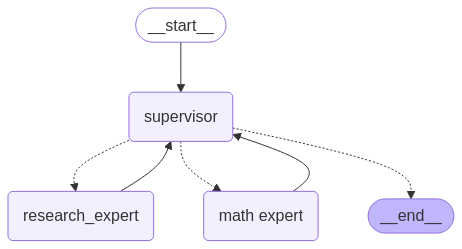

In [6]:
from IPython.display import Image, display
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [8]:
result = app.invoke(
    {"messages":[
        {
            "role": "user",
            "content": "what's the combined headcount of the FAANG companies in 2024?"
        }
    ]}
)

result

{'messages': [HumanMessage(content="what's the combined headcount of the FAANG companies in 2024?", additional_kwargs={}, response_metadata={}, id='47566bf7-303c-4aca-b448-eb48e2b9e8fb'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_6j6Z94M9iL233qwaVOVntAXG', 'function': {'arguments': '{}', 'name': 'transfer_to_research_expert'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 104, 'total_tokens': 119, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b705f0c291', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'sever

In [ ]:
workflow = create_supervisor(
    agents=[math_agent, research_agent],
    output_mode="full_history"
)